<a href="https://colab.research.google.com/github/AmirGhnbr/statistical_time_series_analysis/blob/main/statistical_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q statsmodels seaborn arch yfinance scikit-learn pmdarima mplfinance

In [ ]:
!pip install git+https://github.com/statsmodels/statsmodels

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mplf
import matplotlib.pyplot as plt

In [3]:
data = yf.download('BTC-USD',
                   period='9mo',
                   interval='1d',
                   progress=False)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-05,20335.900391,20343.748047,19801.800781,20160.716797,20160.716797,33223790572
2022-10-06,20161.039062,20408.392578,19900.087891,19955.443359,19955.443359,34711412966
2022-10-07,19957.558594,20041.085938,19395.792969,19546.849609,19546.849609,29227315390
2022-10-08,19546.328125,19601.695312,19299.414062,19416.568359,19416.568359,16437423167
2022-10-09,19417.478516,19542.539062,19349.259766,19446.425781,19446.425781,16837262532
...,...,...,...,...,...,...
2023-07-01,30471.847656,30641.289062,30328.865234,30590.078125,30590.078125,9086606733
2023-07-02,30587.269531,30766.140625,30264.019531,30620.769531,30620.769531,10533418042
2023-07-03,30624.515625,31375.613281,30586.513672,31156.439453,31156.439453,15271884873


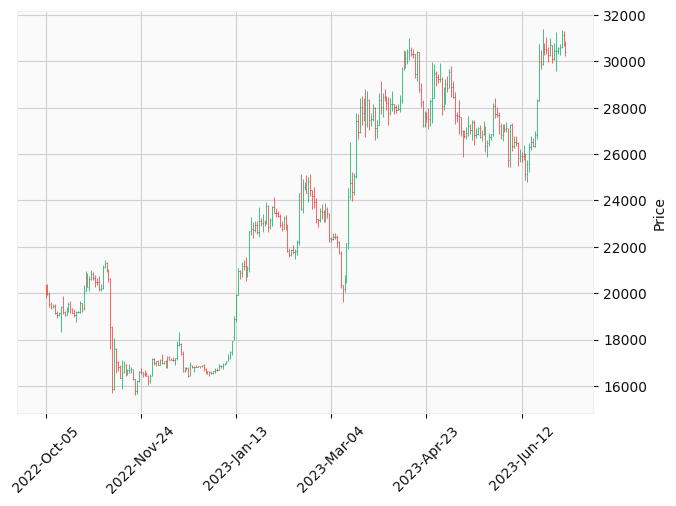

In [4]:
mplf.plot(data, style='yahoo',warn_too_much_data=10000)

### Trying to decompose the non-stationary btc data using stl

In [5]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

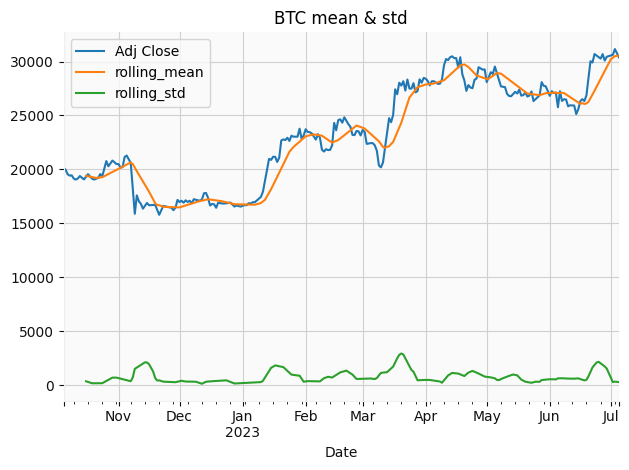

In [6]:
WINDOW_SIZE = 12
data["rolling_mean"] = data["Adj Close"].rolling(window=WINDOW_SIZE).mean()
data["rolling_std"] = data["Adj Close"].rolling(window=WINDOW_SIZE).std()
data[['Adj Close','rolling_mean','rolling_std']].plot(title="BTC mean & std")

sns.despine()
plt.tight_layout()

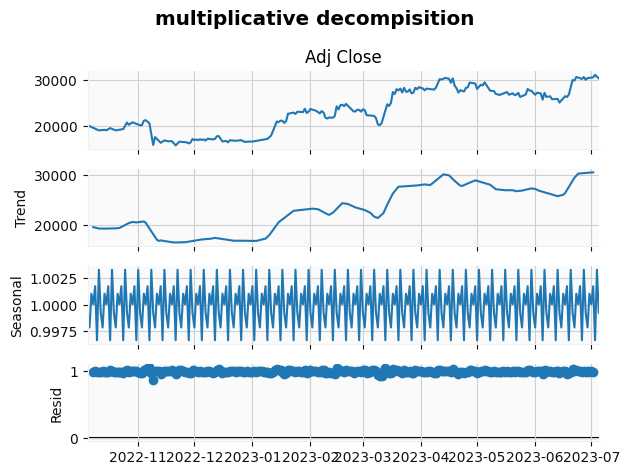

In [7]:
decomposition_res = seasonal_decompose(data['Adj Close'],model='multiplicative')

(
    decomposition_res
    .plot()
    .suptitle('multiplicative decompisition')
)
sns.despine()
plt.tight_layout()

### Let's do STL ans mstl decomposition

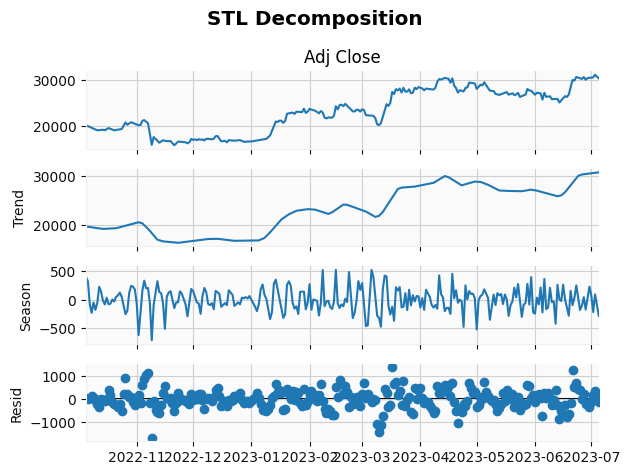

In [9]:
from statsmodels.tsa.seasonal import STL

stl_decomposition = STL(data["Adj Close"]).fit()
stl_decomposition.plot() \
                 .suptitle("STL Decomposition")

sns.despine()
plt.tight_layout()

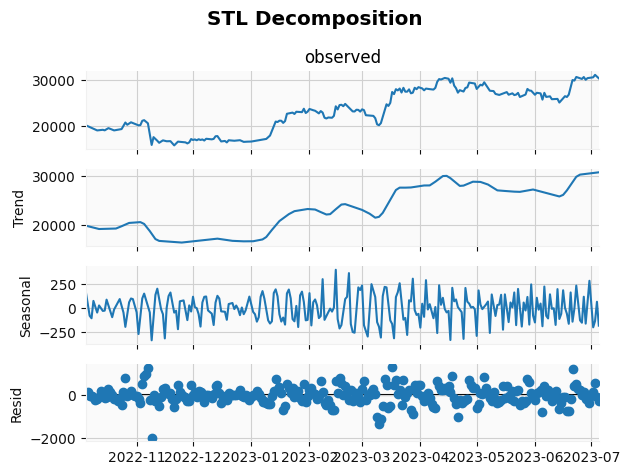

In [10]:
from statsmodels.tsa.seasonal import MSTL

stl_decomposition = MSTL(data["Adj Close"]).fit()
stl_decomposition.plot() \
                 .suptitle("STL Decomposition")

sns.despine()
plt.tight_layout()

## Apply hodrick-prescott filter

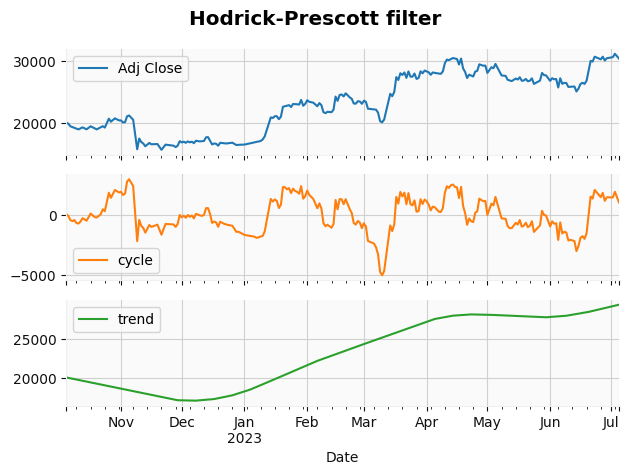

In [14]:
from statsmodels.tsa.filters.hp_filter import hpfilter

hp_df = data[["Adj Close"]].copy()
hp_df["cycle"], hp_df["trend"] = hpfilter(hp_df["Adj Close"], 129600)
hp_df.plot(subplots=True, title="Hodrick-Prescott filter");

sns.despine()
plt.tight_layout()

As you see BTC was finished a down trend in Dec and start new uptrend in Jan, and that trend finished in May , now new uptrend in BTC started at Jul as it was in Jan, expecting to have another 3.5 month uptrend

## Testing for Stationary in time series

Implement Augmented Dickey-Fuller(ADF) test